# Red Wine Quality

Kaggle link: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

## Preliminaries

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics
import random
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import torch
from torch import nn
from sklearn.model_selection import train_test_split
#import wandb
#wandb.init(project="simple_regression")

import os
for dirname, _, filenames in os.walk('./'): # '/kaggle/input'
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./simple-regression.ipynb
./winequality-red.csv
./wandb/debug-internal.log
./wandb/debug-cli.lorenzozanolin.log
./wandb/debug.log
./wandb/run-20231013_152213-1mdmbnvn/run-1mdmbnvn.wandb
./wandb/run-20231013_152213-1mdmbnvn/logs/debug-internal.log
./wandb/run-20231013_152213-1mdmbnvn/logs/debug.log
./wandb/run-20231013_152213-1mdmbnvn/files/requirements.txt
./wandb/run-20231013_152213-1mdmbnvn/files/output.log
./wandb/run-20231013_152213-1mdmbnvn/files/config.yaml
./wandb/run-20231013_152213-1mdmbnvn/files/wandb-metadata.json
./wandb/run-20231013_153847-h2jvr2b3/run-h2jvr2b3.wandb
./wandb/run-20231013_153847-h2jvr2b3/logs/debug-internal.log
./wandb/run-20231013_153847-h2jvr2b3/logs/debug.log
./wandb/run-20231013_153847-h2jvr2b3/files/requirements.txt
./wandb/run-20231013_153847-h2jvr2b3/files/output.log
./wandb/run-20231013_153847-h2jvr2b3/files/config.yaml
./wandb/run-20231013_153847-h2jvr2b3/files/wandb-summary.json
./wandb/run-20231013_153847-h2jvr2b3/files/wandb-metadata.json
./wand

## Data Processing

In [23]:
train_data = pd.read_csv('./winequality-red.csv')    #'/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv'
train_data.head()
train_data.shape

(1599, 12)

First we will split the training set in two parts: *training* and *test* set.

In [24]:

X_train,X_test,y_train,y_test = train_test_split(train_data.iloc[:,:-1],train_data.iloc[:,-1],test_size=0.25) #splitting into training set and test set

#convert the sets from ndarray to tensor
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)


Now we will *normalize* features in the following manner:
- mean and std will be computed on the *training* set
- these values will be used to compute the normalization on the *test* set

In [25]:
def normalize_features(X_train, X_test, y_train, y_test):
    global train_mean, train_std, pred_mean, pred_std

    train_mean = [0,0,0,0,0,0,0,0,0,0,0] 
    train_std =[0,0,0,0,0,0,0,0,0,0,0]
    
    
    for i in range(0, X_train.shape[1]-1):
        train_mean[i] = X_train[i].mean()
        train_std[i] = X_train[i].std()
    
        X_train = (X_train - train_mean[i])/train_std[i]
        X_test = (X_test - train_mean[i])/train_std[i]
    
    print(X_train)
    
    pred_mean = y_train.mean()
    pred_std = y_train.std()
    
    y_train = (y_train - pred_mean) / pred_std
    y_train = torch.tensor(y_train,dtype=torch.float32)

    
    y_test = (y_test - pred_mean) / pred_std
    y_test = torch.tensor(y_test,dtype=torch.float32)
    return X_train, X_test, y_train, y_test

def denormalize_features(X_train, X_test, y_train, y_test):
    global train_mean, train_std, pred_mean, pred_std
    
    
    for i in range(0, X_train.shape[1]-1):
        X_train = (X_train*train_std[i])+train_mean[i]
        X_test = (X_test*train_std[i])+train_mean[i]
    
    y_train = (y_train * pred_std)+pred_mean
    y_train = torch.tensor(y_train,dtype=torch.float32)

    
    y_test = (y_test*pred_std) + pred_mean
    y_test = torch.tensor(y_test, dtype=torch.float32)
    return X_train, X_test, y_train, y_test

X_train_N,X_test_N,y_train_n,y_test_n = normalize_features(X_train,X_test,y_train,y_test)   #normalizing the dataset

tensor([[-0.1343, -0.4955, -0.4943,  ..., -0.3698, -0.4805, -0.0696],
        [-0.2231, -0.4858, -0.5100,  ..., -0.3698, -0.4817, -0.1100],
        [-0.2191, -0.4943, -0.4922,  ..., -0.3767, -0.4761, -0.0454],
        ...,
        [-0.2151, -0.4834, -0.5100,  ..., -0.3642, -0.4712, -0.1100],
        [-0.2434, -0.4890, -0.5084,  ..., -0.3726, -0.4846, -0.1302],
        [-0.1989, -0.4832, -0.5100,  ..., -0.3779, -0.4805, -0.1343]])


/var/folders/47/wgqjbdx10d91c2t28x5n0s5m0000gn/T/ipykernel_64120/3525117486.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train,dtype=torch.float32)
/var/folders/47/wgqjbdx10d91c2t28x5n0s5m0000gn/T/ipykernel_64120/3525117486.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test,dtype=torch.float32)


## Training

Initialize the weights and bias of the linear regression

In [26]:
n_features = X_train.shape[1] 
weights = torch.randn((n_features),requires_grad=True) # initialize a random tensor of weights, one weight for each feature
bias = torch.zeros(1, requires_grad=True)

Some functions definitions

In [27]:
from matplotlib import pyplot as plt


def linreg(X, w, b):        #linear regression
    return torch.matmul(X, w) + b

def sgd(params, lr, batch_size):    #we will use stochastic GD
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            
criterion = nn.MSELoss()    #the loss function will be mean squared error

def data_iter(batch_size, features, labels):    #to divide a single batch in multiple minibatches
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i +
                                                   batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

def print_result(y_true, y_pred):       #plot the graphs
    plt.clf()
    plt.plot(y_pred, 'ro', label='Predictions', alpha=0.5)
    plt.plot(y_true, 'go', label='True', alpha=0.5)
    plt.legend(loc='best')
    plt.colorbar
    plt.show()
    
def print_correctness(ground_truth,predicted_labels):       #prints the accuracy
    print('Accuracy:\f',metrics.accuracy_score(ground_truth,predicted_labels))

Training loop

In [28]:
# MINI BATCH, calculate for each round the derivative for each minibatch, and then sum up them together
num_iterations = 512
batch_size = 16
lr = 1e-3
print('Training loss:')
for i in range(num_iterations):
    for X, y in data_iter(batch_size, X_train_N, y_train_n):    
        loss = squared_loss(linreg(X,weights,bias),y)    #calculate the prediction, i.e. X(train features) * weights +b; then the loss w.r.t. labels
        loss.sum().backward() #derivate calc
        sgd([weights,bias],lr,batch_size)   #update weights
    with torch.no_grad():
        train_l = squared_loss(linreg(X, weights, bias), y) #loss of the final batch of the round
        print(f'epoch {i + 1}, loss {float(train_l.mean()):f}')
    

Training loss:
epoch 1, loss 1.410290
epoch 2, loss 0.777457
epoch 3, loss 0.906950
epoch 4, loss 0.916431
epoch 5, loss 0.802040
epoch 6, loss 0.867119
epoch 7, loss 1.179831
epoch 8, loss 0.644305
epoch 9, loss 0.960792
epoch 10, loss 0.918546
epoch 11, loss 0.642989
epoch 12, loss 0.846357
epoch 13, loss 0.713376
epoch 14, loss 0.843979
epoch 15, loss 0.971167
epoch 16, loss 1.064560
epoch 17, loss 0.468089
epoch 18, loss 0.388702
epoch 19, loss 0.481702
epoch 20, loss 0.621419
epoch 21, loss 0.484674
epoch 22, loss 0.513268
epoch 23, loss 0.850134
epoch 24, loss 0.395173
epoch 25, loss 0.495101
epoch 26, loss 0.258737
epoch 27, loss 0.355370
epoch 28, loss 0.550880
epoch 29, loss 0.478332
epoch 30, loss 0.828356
epoch 31, loss 0.463541
epoch 32, loss 0.823940
epoch 33, loss 0.679138
epoch 34, loss 0.716303
epoch 35, loss 1.050551
epoch 36, loss 0.750464
epoch 37, loss 0.400078
epoch 38, loss 0.559753
epoch 39, loss 0.196976
epoch 40, loss 0.586002
epoch 41, loss 0.321582
epoch 42, 

## Testing

We need to calculate the loss also over the test set

In [29]:
# test on the test dataset
with torch.no_grad():
    test_l = 0
    for X, y in data_iter(batch_size, X_test_N, y_test_n):
        test_l += squared_loss(linreg(X, weights, bias), y).sum()
    test_l /= len(X_test)
    print(f'loss on the test dataset {float(test_l):f}')

loss on the test dataset 0.539680


## Results

Finally, the obtained predictions are the following

Accuracy: 0.4725


/var/folders/47/wgqjbdx10d91c2t28x5n0s5m0000gn/T/ipykernel_64120/3525117486.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train,dtype=torch.float32)
/var/folders/47/wgqjbdx10d91c2t28x5n0s5m0000gn/T/ipykernel_64120/3525117486.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32)


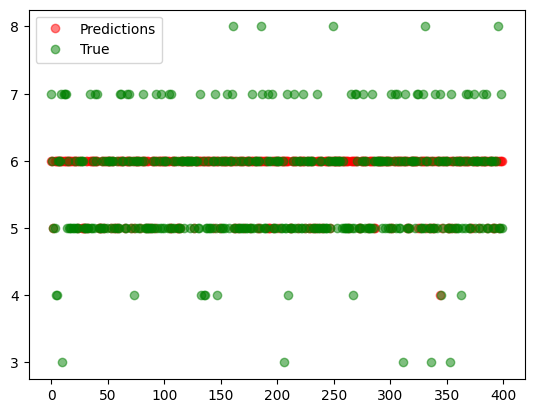

In [30]:
test_predictions_N = []
with torch.no_grad():
    for X in X_test_N:
        test_predictions_N.append(linreg(X,weights,bias))       #we calculate all the predictions on the test set

_,_,test_predictions,y_test = denormalize_features(X_train_N,X_test_N,torch.tensor(test_predictions_N),y_test_n)    #we denormalize the features

test_predictions = test_predictions.round()     #aproximation, since we need int values

with torch.no_grad():
    print_correctness(y_test,test_predictions)  #prints accuracy
    print_result(y_test,test_predictions)